In [1]:
# Importing the necessary libraries to perform Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the datasets

athletes = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Olympics 2021 Dataset/athlete_events.csv')
regions = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Olympics 2021 Dataset/noc_regions.csv')

In [3]:
# View the Dataset

athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Join the dataframes

olympics_df = athletes.merge(regions, how = 'left', on = 'NOC')
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
# View the shape of the dataframe

olympics_df.shape

(271116, 17)

In [7]:
# Make the column names consistent in the merged dataframe

olympics_df.rename(columns = {'region':'Region', 'notes':'Notes'}, inplace = True)
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
# Get the info about the dataset

olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
# Get the statistical information of the dataset

olympics_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [10]:
# Check for null values

nan_values = olympics_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [11]:
# Check the number of null values

olympics_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
# Diplay the columns with null values in form of a list

null_value_list = olympics_df.columns[olympics_df.isnull().any().tolist()]
null_value_list

Index(['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes'], dtype='object')

In [13]:
# USA olympics details

olympics_df.query('Team == "United States"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [14]:
# Japan olympics details

olympics_df.query('Team == "Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [15]:
# Top 10 countries participated in olympics since the start

top_10_countries = olympics_df.Team.value_counts().sort_values(ascending = False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

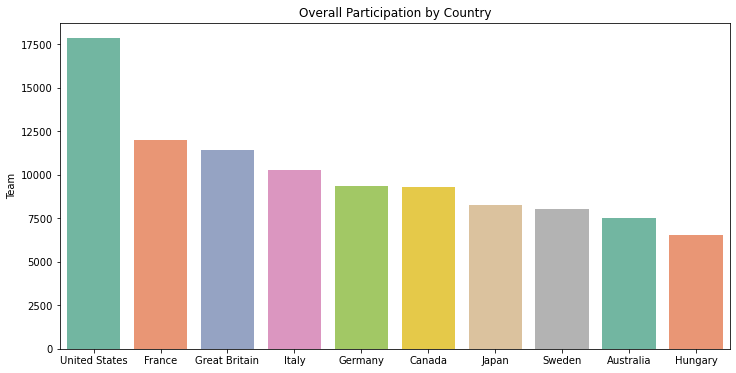

In [16]:
# Plot for the top 10 countries

plt.figure(figsize = (12,6))
plt.title('Overall Participation by Country')
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette = 'Set2');

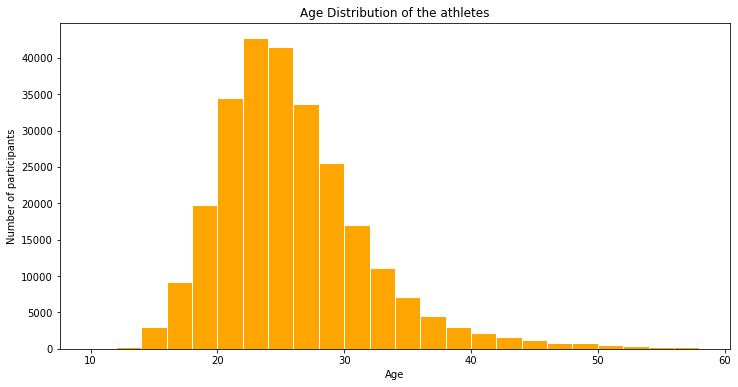

In [17]:
# Age distribution of the participants

plt.figure(figsize = (12,6))
plt.title('Age Distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(olympics_df.Age, bins = np.arange(10,60,2), color = 'orange', edgecolor = 'white');

In [18]:
# Winter Olympics Sports

winter_sports = olympics_df[olympics_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [19]:
# Summer Olympics Sports

summer_sports = olympics_df[olympics_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [20]:
# Male and Female athletes

gender_counts = olympics_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

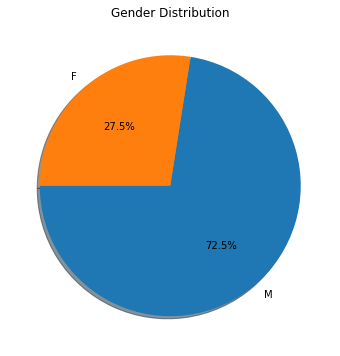

In [21]:
# Pie plot for male and female athletes

plt.figure(figsize = (12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 180, shadow = True);

In [22]:
# Total medals won by athletes

olympics_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [23]:
# Total number of female atheletes in each summer olympics

female_athletes = olympics_df[(olympics_df.Sex == 'F') & (olympics_df.Season == 'Summer')][['Sex', 'Year']]
female_athletes = female_athletes.groupby('Year').count().reset_index()
female_athletes.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


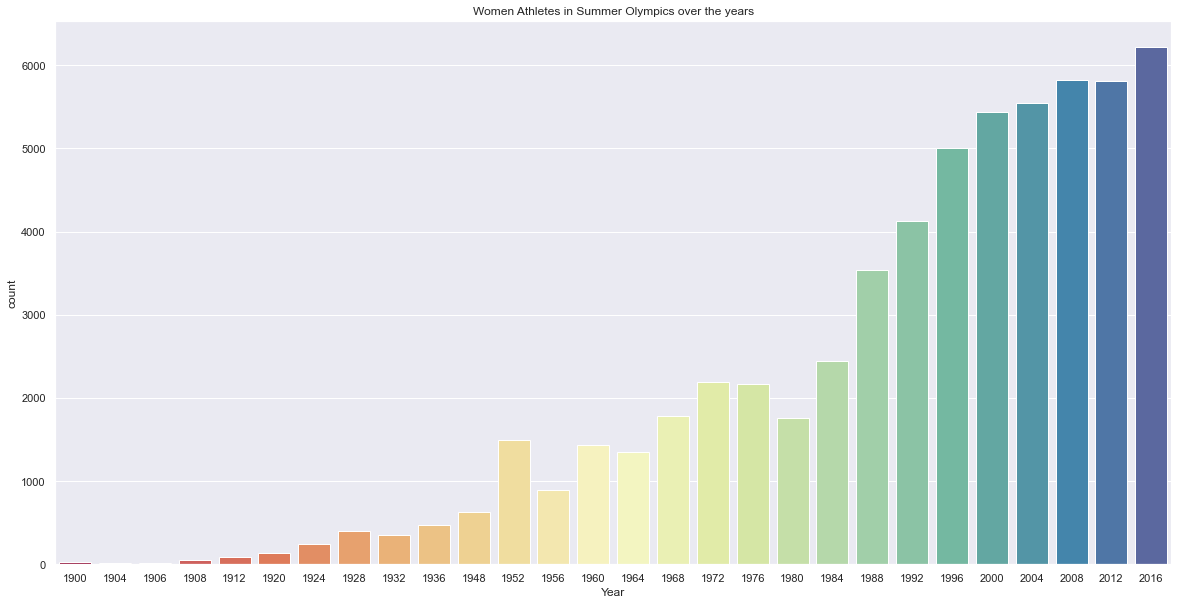

In [24]:
# Plotting the number of female atheletes in Summer olympics over the years

women_athletes = olympics_df[(olympics_df.Sex == 'F') & (olympics_df.Season == 'Summer')]
sns.set(style = 'darkgrid')
plt.figure(figsize = (20,10))
sns.countplot(x = 'Year', data = women_athletes, palette = 'Spectral')
plt.title('Women Athletes in Summer Olympics over the years');

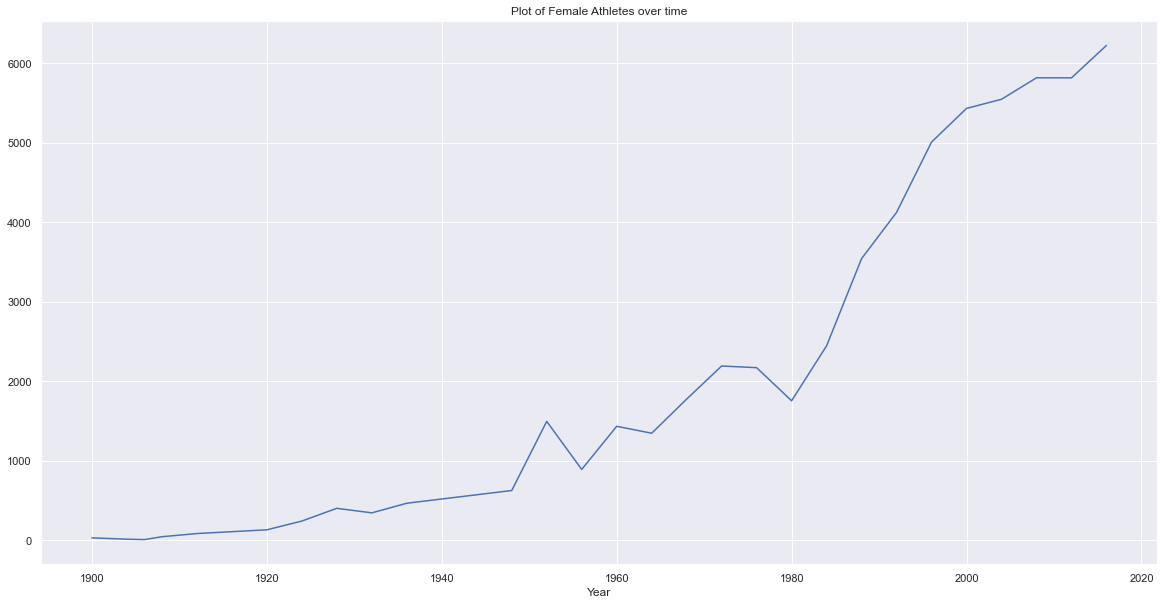

In [25]:
# Plot of female athelets over time
plot = women_athletes.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (20,10))
plot.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time');

In [26]:
# Gold Medal Winners

gold_win = olympics_df[(olympics_df.Medal == 'Gold')]
gold_win.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [27]:
# Take only the non NaN values

gold_win = gold_win[np.isfinite(gold_win['Age'])]

In [28]:
# Gold Winner for athletes beyond 60 years of age

gold_win['ID'][gold_win['Age'] > 60].count()

6

In [29]:
# Sporting event for which these 6 gold medals were won

sporting_event = gold_win['Sport'][gold_win['Age'] > 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

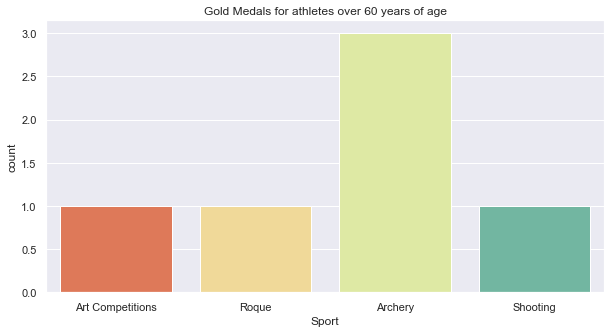

In [30]:
# Plot for sporting event

plt.figure(figsize = (10,5))
plt.tight_layout()
sns.countplot(x = sporting_event, palette = 'Spectral')
plt.title('Gold Medals for athletes over 60 years of age');

In [31]:
# Gold Medals from each country

gold_win.Region.value_counts().reset_index(name = 'Medal').head()


,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


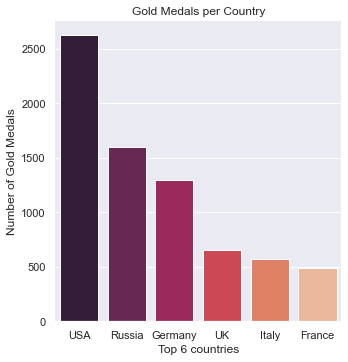

In [32]:
# Plotiing the gold medals won by country

total_gold_win = gold_win.Region.value_counts().reset_index(name = 'Medal').head(6)
g = sns.catplot(x = 'index', y = 'Medal', data = total_gold_win, height = 5, kind = 'bar', palette = 'rocket')
g.despine(left = True)
g.set_xlabels('Top 6 countries')
g.set_ylabels('Number of Gold Medals')
plt.title('Gold Medals per Country');

In [33]:
# 2016 Rio Summer Olympics analysis

rio_olympics = olympics_df.Year.max()
print(rio_olympics)

teams_gold = olympics_df[(olympics_df.Year == rio_olympics) & (olympics_df.Medal == 'Gold')].Team
teams_gold.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

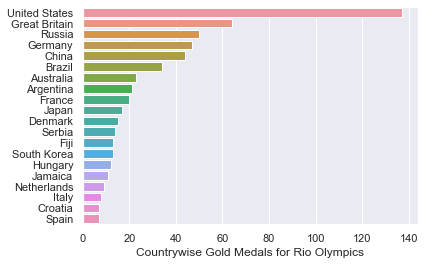

In [34]:
sns.barplot(x = teams_gold.value_counts().head(20), y = teams_gold.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Countrywise Gold Medals for Rio Olympics');

In [35]:
not_null_medals = olympics_df[(olympics_df['Height'].notnull()) & (olympics_df['Weight'].notnull()) & (olympics_df['Medal'].notnull())]

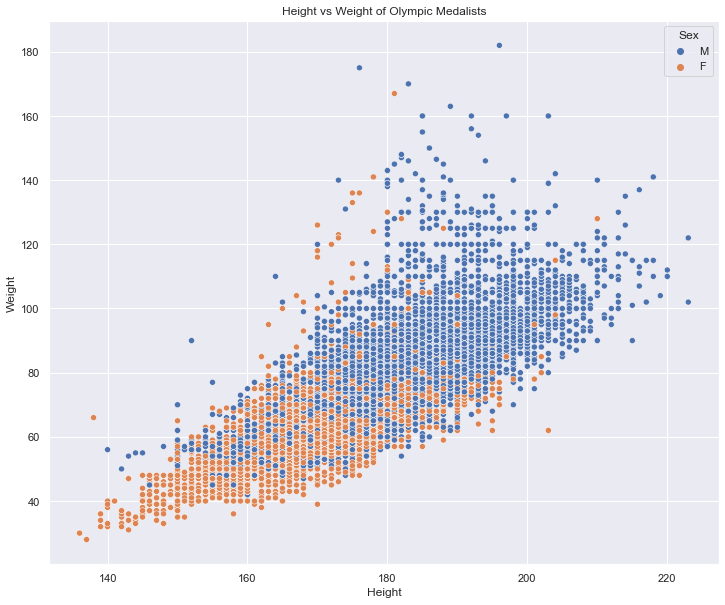

In [36]:
# Scatter plot for male and female athletes with medals won  

plt.figure(figsize = (12,10))
axis = sns.scatterplot(x = 'Height', y = 'Weight', data = not_null_medals, hue = 'Sex')
plt.title('Height vs Weight of Olympic Medalists');